### 207. Course Schedule - 4/28/2024

In [ ]:
############################### Improvement Table ###########################################
"""
Repitition # -  Time Taken   
1st Repetetion - 30 mins with lots of help but understood the logic behind it
2nd Repetetion - 20 mins with less than compared to the 1st repetition
3rd Repetetion - 20 mins with a lot of help, back after 20 to 20 days

4th Repetition - 20 mins, got the logic, a lot help in implmentation


clock - 58 mins

Here we convert a list of list to a graph problem where each course
represents a node in the graph and the directed edges between them
say that we need the other to take the current course/node/vertex
"""

### Model Answer

### 1st Repitition

In [1]:
"""
UMPIRE: 

U: we have a list of numCourses where an element [ai, bi] 
indicates that to take course ai we must take bi

Q1. How to figure out a cycle in the list ?
A1. for better understanding we are going to imagine    
    a directed graph in which we are trying to find a 
    cycle using dfs and visited set 

M: Backtracking -> where after each iteration, we remove starting node
    from the visitedSet, hashMap, visitedSet and dfs

P:
1. using hashMap, we are going to create a adjacentyList
    which tells us which vertices/nodes have edges
    and if we have a cycle in this directed graph
    then we can't complete all the courses
    otherwise we can coplete all the courses

2. We are going to use visitedSet as the backtracking mechasim
    to traverse for every course in the given array.
    this way we are going to verify whether this course 
    can be completed or not

3. Also, in the hashmap an 'key' have 'value' = [] would
    mean that the course can be completely without any issues

NOTE: it may be called adjacney list but we are going to use dictionary

"""

class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        adjList = {i: [] for i in range(numCourses)}
        visitSet = set()

        for crs, pre in prerequisites:
            adjList[crs].append(pre)

        def dfs(crs):
            if crs in visitSet:
                return False
            
            if adjList[crs] == []:
                return True
            
            visitSet.add(crs)
            
            for pre in adjList[crs]:
                if not dfs(pre):
                    return False
                
            visitSet.remove(crs)
            adjList[crs] = []

            return True
        

        for crs in range(numCourses):
            if not dfs(crs):
                return False
            
        return True


'\nUMPIRE: \n\nU: \n'

### 2nd Repetition - 5/9/2024

In [1]:
"""
UMPIRE:

U: we are given a list of list of form [ai, bi] where to take couse   
    ai we have to take course bi, our job is to verify if we can take all
    the courses or not. 

    not being able to take all courses mean:
    we have two couses like [ai, bi], [bi, ai], where to take ai we have to 
    take bi but to take bi we have to take ai, creating a cycle 

M: dfs traveral to detect a cycle in the graph contructed from the
    given list of list and using visitedSet

P:
1. create a adj_list from the given list of lists and visistedSet
    where visistedSet keeps record of the crs we have visited
2. using dfs traversal detect a cycle in the graph
3. after verifying a course can be taken we will update the adj_list
    having an empty list

4. throughout the algo we are trying to prove it false
"""
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        
        hashMap = {i: [] for i in range(numCourses)}
        visitedSet = set()

        for crs, pre in prerequisites:
            hashMap[crs].append(pre)


        def dfs(node):
            if node in visitedSet:
                return False
            
            if hashMap[node] == []:
                return True
            
            visitedSet.add(node)

            for pre in hashMap[node]:
                if not dfs(pre):
                    return False
                
            hashMap[node] = []
            visitedSet.remove(node)
            # we are removing the current crs
            # from the visisted set because 
            # we are checing the validailty of 
            # each crs one by one
            # Hence, there is a case where we might 
            # travseral a crs twice due to it being a
            # prereq

            return True



        for crs in range(numCourses):
            # Here we are checking for each course
            if not dfs(crs):
                return False
        return True





NameError: name 'List' is not defined

### 3rd Repition 

In [2]:
"""
UMPIRE:
U: We are given list of prerequisists in the [ai, bi] format which indicates that 
we must take course bi first if we want to take course ai

NOTE: One way to detect an cycle is doing dfs search and store visitedCourse
        and remove from the visitedCourse once we are confirm that 
        we can take that course

    : Here we are also creating an graph adjaceny list to detect an cycle

M: DFS + VisitedCourse


P: 

"""
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]):
        visitedSet = set()
        hashMap = {i: [] for i in range(len(prerequisites))}

        for crs, pre in numCourses:
            hashMap[crs].append(pre)


        def dfs(node):
            if node in visitedSet:
                return False

            if hashMap[node] == []:
                return True
            
            visitedSet.add(node)

            for pre in hashMap[node]:
                if not dfs(pre):
                    return False
                
            hashMap[node] = []
            visitedSet.remove(node)

            return True
  


        for crs in range(numCourses):
            if not dfs(crs):
                return False
            
        return True




'\nUMPIRE:\nWe are given list of prerequisists in the [ai, bi] format which indicates that \nwe must take course bi first if we want to take course ai\n\nNOTE:\n\n'

### 4th Attempt

In [ ]:
"""
UMPIRE:

U: we are given a list of pair [l, r], where to take course 'l' we have to take 
course 'r'. our job is to figure out whether we can take all the courses
or not. taking all courses means we can complete all prequiresit courses
and there's no cycle where for example:
[l, r], [r, l] to take 'l' course we have to take 'r' and to take 'r' we 
have to take 'l' which indicates a cycle

M: dfs, detecting a cycle,

P: we do this by travesring through the list in an dfs manner and checking
if a parituclar course is in already visitedSet set.
we alos have to make sure we remove the course from visitedSet after return
as there could be a edge case where 
[l, r], [r, g], [g, h],
[e, r]

Q1. how do we traverse through list of list
A1. we make a hashmap, which makes it easier to 
do dfs traversal

so input:
numCourses = 2, prerequisites = [[1,0],[0,2], [0, 3], [3, 5]]

hMap = {1: [0],
        0: [2, 3],
        3: [5]}

hMap makes it easier to do dfs traversal

"""
class Solution:
    def canFinish(self, numCourses: int, prerequisities: List[List[int]]):
        hMap = { i: [] for i in range(numCourses)}
        vSet = set()

        for cre, pre in prerequisities:
            hMap[cre].append(pre)

        def dfs(node):
            if node in vSet:
                return False
            
            vSet.add(node)

            for pre in hMap[node]:
                if not dfs(pre):
                    return False
                
            dfs(hMap(node))

            hMap[node] = []
            vSet.remove(node)
            

            return True

        for cre in range(numCourses):
            if not dfs(cre):
                return False
            
        return True
           


### 5th Attempt - 10/4/2024

In [ ]:
"""
UMPIRE:

U: we are given a list of pairs [i, j], where both i and j in courese 
to take 'i' course, first we have to take 'j' course

visual example:
i <--- j

so 'i' course have an in-degree of 1
in-degree: no. of directed node towards the course 'i' or course 'j'

Our Job is return true or false based upon whether we detect an cycle
or not

M: to detect a cycle we can either use bfs or dfs, but
today we are going to use bfs and in-degree mech. with que


P:
# construction a adajecncy list
        # in-degree for each number

        # we start the queue, with nodes with in-degree == 0
        # using while loop
            # traverse the node, and substract in-degree acc. to 
                #adajency list
            # increase the count of processed course which we can take
            # if curNode in-degree count is zero append it queue

        # return if count == numCourses

"""
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        adjList = defaultdict(list)
        in_degree = defaultdict(int)
        for dest, src in prerequisites:
            adjList[src].append(dest) # to take 'dest' course, "FIRST" we to to take 'src' course
            in_degree[dest] += 1 # Computing the in-degree of 'dest' course

        que = [] # queue to store nodes, which have in-degree == 0, which means 
        # these courses don't have an prerequisists, to we can start our while loop
        # with this course
        for i in range(numCourses):
            if in_degree[i] == 0:
                que.append(i)

        count = 0
        while (que):
            curCourse = que.pop(0)
            count += 1

            # Once, we know a course doesn't have a prerequirest, we can use the adjList to 
            # traverse through all courses, for this our curCourse was a prequissit,
            # and decrement the in-degree, because we have already taken this course
            # if the in_degree of the neighbor node is 0, we append it to our queue
            for nei in adjList[curCourse]:
                in_degree[nei] -= 1
                if in_degree[nei] == 0:
                    que.append(nei)

        return count == numCourses
        

        #Example Run
        # Test Case: 
            # Input: numCourses = 2, prerequisites = [[1,0],[0,1]]
            # adjList = {1: 0, 0: 1}


            #             0  1   -> index represent the course no., as coureses are as an interger
            #in_degree = [1, 1]
            # As here, we don't have any course with in-degree equal to zero, we are going to
            # just return False

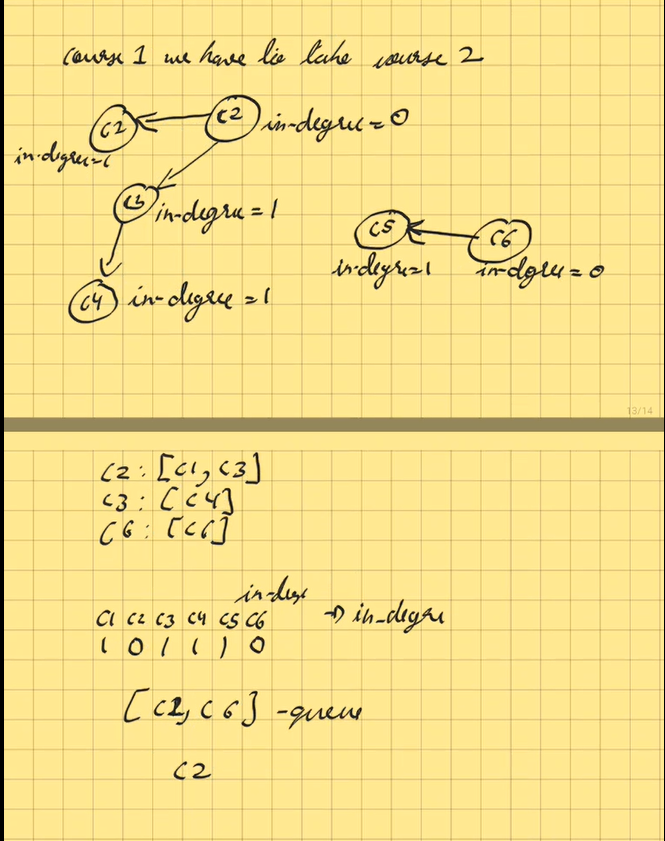